In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import os
file_path = os.path.join("..","data", "marketing_campaign.csv")
print("Current working directory:", os.getcwd())


Current working directory: e:\Customer_segmentation_PCA\notebook


In [19]:
df = pd.read_csv(file_path, sep=';')
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [21]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [22]:
#To remove the NA values
df = df.dropna()


In [23]:
#converting the datatype of the column "Dt_Customer" to datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# implementing PCA

#Step 1: Standardizing the data

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df.select_dtypes(include=['float64', 'int64'])) # As scale numeric data
scaled_data

array([[-0.0198093 , -0.98644293,  0.2340627 , ...,  0.        ,
         0.        ,  2.37795178],
       [-1.05100909, -1.23680074, -0.23455948, ...,  0.        ,
         0.        , -0.42052997],
       [-0.44552551, -0.31882209,  0.76947764, ...,  0.        ,
         0.        , -0.42052997],
       ...,
       [ 0.51764587,  1.01641959,  0.18809052, ...,  0.        ,
         0.        , -0.42052997],
       [ 0.81469298, -1.06989553,  0.67538765, ...,  0.        ,
         0.        , -0.42052997],
       [ 1.17484335, -1.23680074,  0.02470453, ...,  0.        ,
         0.        ,  2.37795178]])

In [ ]:
# step 2: Apply PCA Algorithm
from sklearn.decomposition import PCA

pca = PCA(n_components=3)   # n_components are the number of PCA components we want to have
pca_components= pca.fit_transform(scaled_data)
pca_components



array([[ 3.7707224 , -0.0563147 , -0.30782857],
       [-2.37635457,  0.23798361, -0.16438184],
       [ 1.62001843,  0.13382788, -1.03576804],
       ...,
       [ 1.46115512, -0.02037582,  0.93405918],
       [ 1.74980075,  1.31553959, -1.03606801],
       [-1.69285697,  0.63915672,  1.09095549]])

In [65]:
print(f"Original dimensions: {scaled_data.shape[1]}")
print(f"Reduced dimensions: {pca_components.shape[1]}")
print(f"Variance explained: {sum(pca.explained_variance_ratio_):.2%}")

Original dimensions: 26
Reduced dimensions: 3
Variance explained: 43.67%


In [66]:
# cluster the data using KMeans
from sklearn.cluster import KMeans

## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(pca_components)
    wcss.append(kmeans.inertia_)

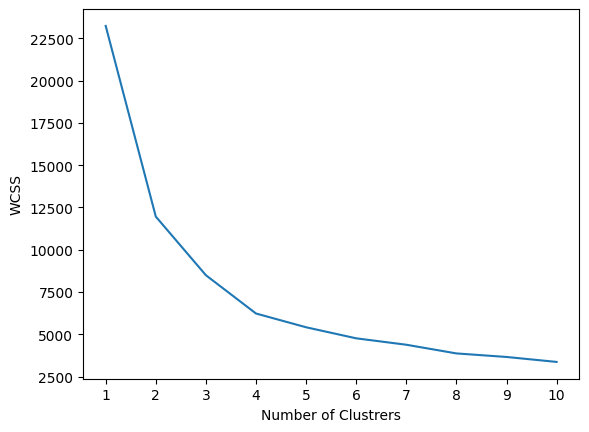

In [67]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

#### seems k= 4, but very confusing elbow plot, lets verify with kneelocator

In [68]:
## Validating the k value
## kneelocator
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kl.elbow

np.int64(4)

In [69]:
# Step 3: Cluster in the reduced space
kmeans=KMeans(n_clusters=4,init="k-means++")
clusters =kmeans.fit_predict(pca_components)
clusters

array([2, 1, 2, ..., 3, 3, 1], dtype=int32)

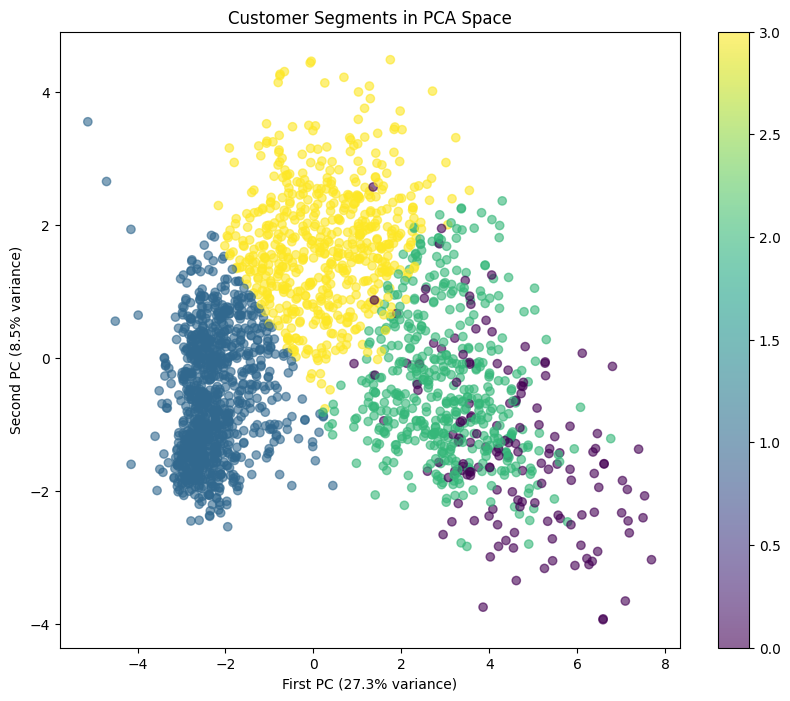

In [70]:
# step 4 : Visualize the clusters
if pca_components.shape[1] >= 2:
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], 
                         c=clusters, cmap='viridis', alpha=0.6)
    plt.xlabel(f'First PC ({pca.explained_variance_ratio_[0]:.1%} variance)')
    plt.ylabel(f'Second PC ({pca.explained_variance_ratio_[1]:.1%} variance)')
    plt.title('Customer Segments in PCA Space')
    plt.colorbar(scatter)
    plt.show()

In [71]:
pca = PCA(n_components=4)
pca_components= pca.fit_transform(scaled_data)
sum(pca.explained_variance_ratio_)

np.float64(0.49517934490216375)

In [72]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(pca_components)
    wcss.append(kmeans.inertia_)
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kl.elbow

np.int64(4)

In [73]:
kmeans=KMeans(n_clusters=4,init="k-means++")
clusters =kmeans.fit_predict(pca_components)


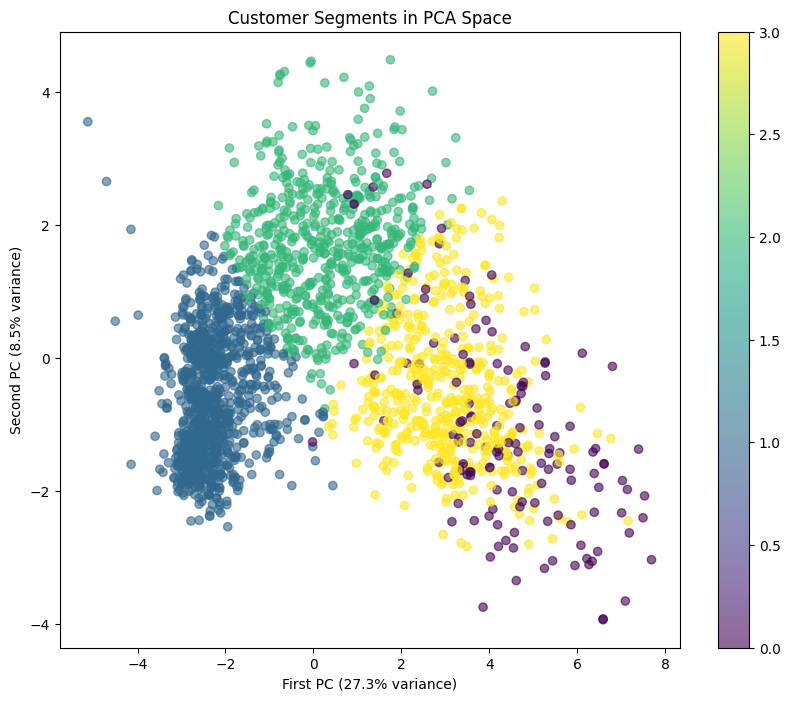

In [74]:
if pca_components.shape[1] >= 2:
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], 
                         c=clusters, cmap='viridis', alpha=0.6)
    plt.xlabel(f'First PC ({pca.explained_variance_ratio_[0]:.1%} variance)')
    plt.ylabel(f'Second PC ({pca.explained_variance_ratio_[1]:.1%} variance)')
    plt.title('Customer Segments in PCA Space')
    plt.colorbar(scatter)
    plt.show()

In [75]:
pca = PCA(n_components=5)
pca_components= pca.fit_transform(scaled_data)
sum(pca.explained_variance_ratio_)

np.float64(0.5415443340658711)

In [76]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(pca_components)
    wcss.append(kmeans.inertia_)
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kl.elbow

np.int64(3)

In [77]:
kmeans=KMeans(n_clusters=3,init="k-means++")
clusters =kmeans.fit_predict(pca_components)

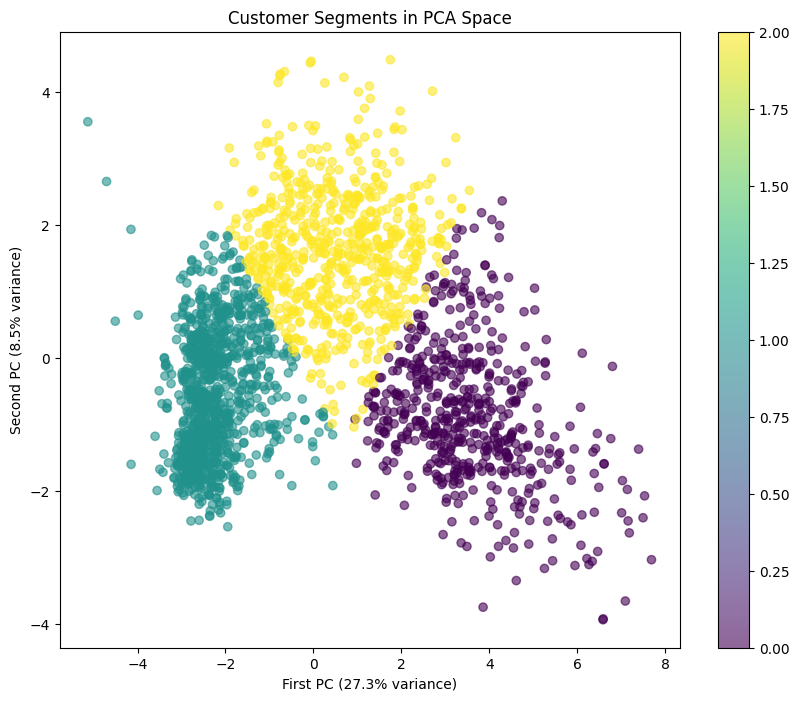

In [78]:
if pca_components.shape[1] >= 2:
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], 
                         c=clusters, cmap='viridis', alpha=0.6)
    plt.xlabel(f'First PC ({pca.explained_variance_ratio_[0]:.1%} variance)')
    plt.ylabel(f'Second PC ({pca.explained_variance_ratio_[1]:.1%} variance)')
    plt.title('Customer Segments in PCA Space')
    plt.colorbar(scatter)
    plt.show()